In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# filepath = "resuls/final_np1.txt"
filepath = "results/final.txt"
ds = pd.read_csv(filepath, delim_whitespace=True, header=None, names=None)
new_column_names = ["x", "y", "vorticity", "stream function", "u-velocity", "v-velocity"]
ds.columns = new_column_names

In [3]:
Nx = len(np.unique(ds['x']))
Ny = len(np.unique(ds['y']))

X = ds['x'].values.reshape(Nx, Ny)
Y = ds['y'].values.reshape(Nx, Ny)
Vorticity = ds['vorticity'].values.reshape(Nx, Ny)
Stream = ds['stream function'].values.reshape(Nx, Ny)
U = ds['u-velocity'].values.reshape(Nx, Ny)
V = ds['v-velocity'].values.reshape(Nx, Ny)

In [4]:
def plot_contour(ax, X, Y, Z, title, levels=50, cmap='viridis'):

    cf = ax.contourf(X, Y, Z, levels, cmap=cmap)
    cbar = plt.colorbar(cf, ax=ax)
    cbar.set_label(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title+' contour plot')
    ax.grid(False)

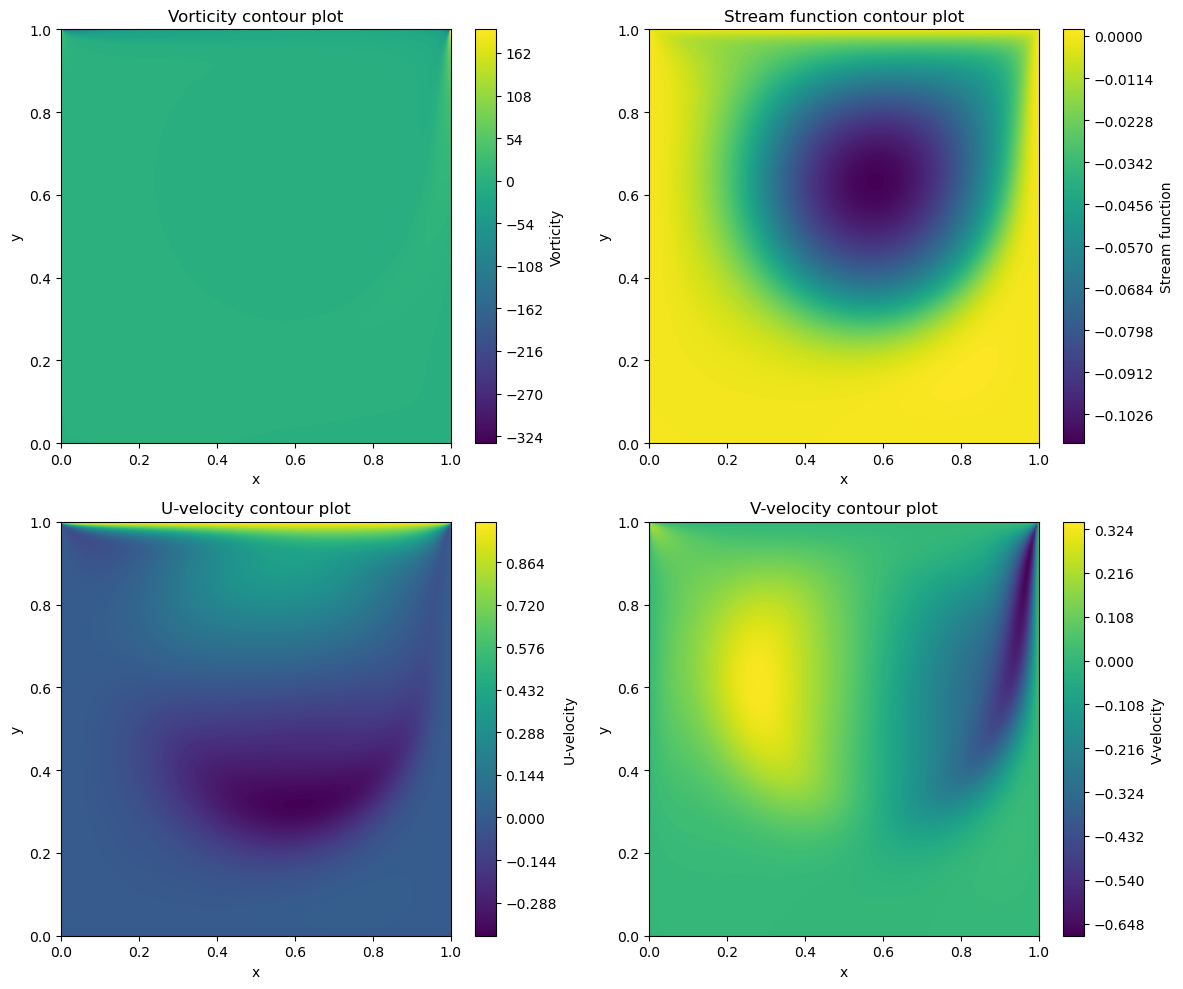

In [5]:
data = [(X, Y, Vorticity, 'Vorticity'),
        (X, Y, Stream, 'Stream function'),
        (X, Y, U, 'U-velocity'),
        (X, Y, V, 'V-velocity')]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot each subplot
for ax, (X, Y, Z, title) in zip(axs.ravel(), data):
    plot_contour(ax, X, Y, Z, title, levels=200)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'MPI Scaling')

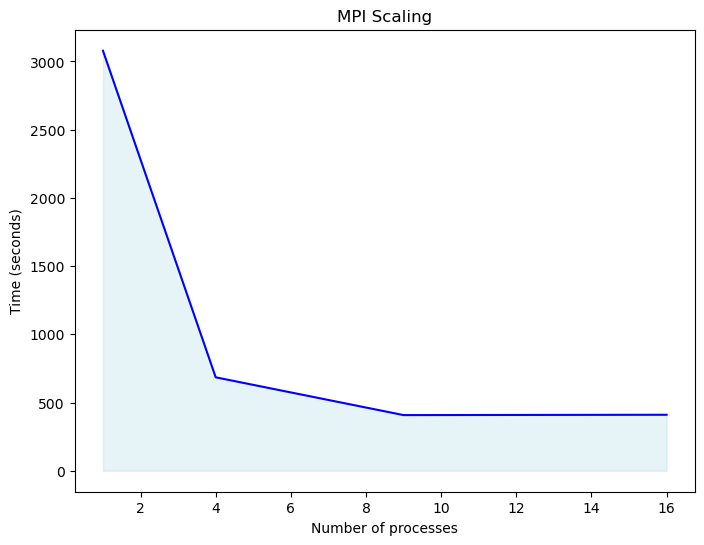

In [6]:
x = [1,4,9,16]
y = [3078.48,684.713,407.762,410.149]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='Line')
plt.fill_between(x, y, color='lightblue', alpha=0.3)
plt.xlabel("Number of processes")
plt.ylabel("Time (seconds)")
plt.title("MPI Scaling")